In [13]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Affine Set

line이 $ x_1, x_2$을 지나갈때.. 여기에 속하는 모든 points. 

$$ x = \theta x_1 + (1-\theta)x_2 $$


예를 들어서 (2, 3) 에서 (4, 5)를 지나가는 선이 있고, 이 선위의 점을 찾으려면 Affine Set을 구하면 됩니다. 

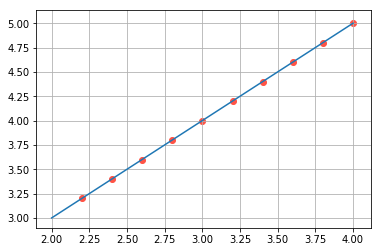

In [77]:
def affine(a, b, theta=0.2):
    return theta * a + (1-theta)* b

a = np.array([2, 3])
b = np.array([4, 5])


affine_points = [affine(a, b, theta) for theta in np.arange(0, 1, 0.1)]
x, y = [x for x in zip(*affine_points)]

plot(*[x for x in  zip(a, b)])
scatter(x, y, color='#ff5345')
grid()

### References

* http://www-personal.umich.edu/~mepelman/teaching/IOE611/Handouts/Sets.pdf